In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

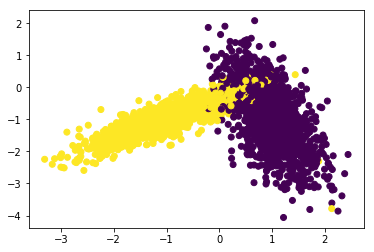

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [24]:
from sklearn.metrics import accuracy_score


def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train_total: its numpy array of shape, (n,d)
    # y_train_total: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # num_of_total_fold: an integer, represents number of num_of_total_fold we need to devide the data and test our model

    # generating hyper-parameter range
    # generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    random_param_range = sorted(random.sample(range(1, param_range), 10))

    train_scores = []
    test_scores = []

    classifier_params = { 'n_neighbors': random_param_range }
     # it will take classifier and set of values for hyper prameter in dict type
    # dict({hyper parmeter: [list of values]})
    # as we are implementing this only for KNN, the hyper parameter should be n_neighbors
    # And I will return it from the function at the end so that I can use this same params
    # while plotting the graph as well

    for k in tqdm(classifier_params['n_neighbors']):
        trainscores_folds = []
        testscores_folds = []

        for j in range(0, folds):
            # divide numbers ranging from  0 to len(x_train_fold) into groups = num_of_total_fold
            # basically, splitting the data into k groups (k = len(x_train_fold) / num_of_total_fold)
            # It works by first training the algorithm on the k_1 group of the data and
            # evaluating it on the kth hold-out group as the test set. This is repeated
            # so that each of the k groups is given an opportunity to be held out and used as the test set.
            # ex: num_of_total_fold=3, and len(x_train_total)=100, we can divide numbers from 0 to 100 into 3 groups
            # group 1: 0-33, group 2:34-66, group 3: 67-100
            num_fold = int(len(x_train) / folds)

            # for each hyperparameter that we generated in step 1:
            # and using the above groups we have created in step 2 you will do cross-validation as follows

            # first we will keep group 1+group 2 i.e. 0-66 as train data and
            # group 3: 67-100 as test data, and find train and test accuracies
            # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and
            # group 2: 34-66 as test data, and find train and test accuracies
            # third we will keep group 2+group 3 i.e. 34-100 as train data and
            # group 1: 0-33 as test data, and find train and test accuracies
            # based on the 'num_of_total_fold' value we will do the same procedure

            # NOW IMPLEMENTATION OF THE CONCEPT OF 'fold' as below
            # For each of this inner loop running for values of j (where j represents num_of_total_fold of 0, 1, 2, 3 ...)
            # each of the test_indices will have the data of a single fold ( which is = num_of_elements_in_each_fold )
            # i.e. the test_indices will be the range starting at
            # num_of_elements_in_each_fold * j and ending at num_of_elements_in_each_fold * (j + 1)
            # And this whole range needs to be converted to list => then apply set() to the list
            # => and then again converted to list
            test_indices = list(set(list(range((num_fold * j), (num_fold*(j+1))))))
            # print('test_indices ', test_indices)

            # And the whole rest of the indices of the dataset will be the train_indices
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) )
            # print('train_indices ', train_indices)

            ''' So for a dataset of total 100 rows, one loop of j, will have the following test_indices and train_indices

            test_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

            train_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]

            And the next loop of j will have as below (for the same dataset of total 100 rows )

            test_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
            train_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
            '''
            # after we have above, now select datapoints based on test_indices and train_indices
            x_train_fold = x_train[train_indices]
            y_train_fold = y_train[train_indices]
            x_test_fold = x_train[test_indices]
            y_test_fold = y_train[test_indices]

            # Now based on our classifier assign corresponding parameter values
            # and also fit() and predict()
            classifier.n_neighbors = k
            classifier.fit(x_train_fold, y_train_fold)

            # First predict based on x_test_fold and keep the accuracy score in the testscores_folds
            y_predicted = classifier.predict(x_test_fold)
            testscores_folds.append(accuracy_score(y_test_fold, y_predicted))

            # Now run prediction based on x_train_fold and append the accuracy score in the trainscores_folds
            y_predicted = classifier.predict(x_train_fold)
            trainscores_folds.append(accuracy_score(y_train_fold, y_predicted))

        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
    return train_scores, test_scores, classifier_params

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Our Classifier is KNN, hence assign a variable to it.
neigh = KNeighborsClassifier()
params_range = 50
folds = 3

# Now invoking our custom function randomized_search_cv_custom(x_train,y_train,classifier, param_range, num_of_total_fold) and store the returned values
testscores, trainscores, params = RandomSearchCV(X_train, y_train, neigh, params_range, number_of_total_folds)

print('trainscores are: ', trainscores)
print('testscores are: ', testscores)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.72it/s]

trainscores are:  [0.9510666666666667, 0.9529333333333333, 0.9540000000000001, 0.9545333333333333, 0.9546666666666667, 0.9540000000000001, 0.9546666666666667, 0.9561333333333333, 0.9556, 0.9562666666666667]
testscores are:  [0.9611333333333333, 0.9608666666666666, 0.9596666666666667, 0.9585333333333335, 0.9575999999999999, 0.9568666666666666, 0.9575333333333332, 0.9579333333333334, 0.9580666666666667, 0.9582]


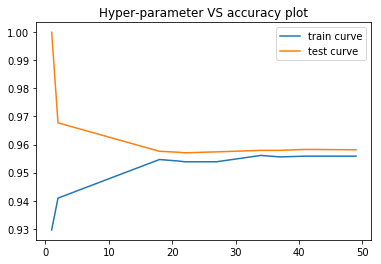

In [19]:
plt.plot(params['n_neighbors'], trainscores, label='train curve')
plt.plot(params['n_neighbors'], testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [26]:
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

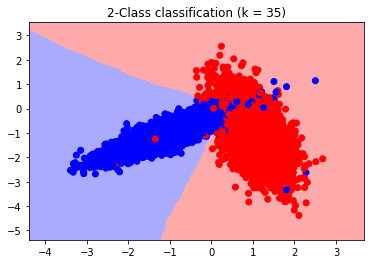

In [28]:
neigh = KNeighborsClassifier(n_neighbors = 35)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)